In [1]:

#import libruaries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import style
style.use('ggplot')
import re
import nltk
from bs4 import BeautifulSoup
from tqdm import tqdm
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from joblib import dump

In [2]:
## read dataset

df = pd.read_csv('static\Customer Sentiment Analysis.csv')
df.head()

,Timestamp,Name :-,Gender :-,Age :-,Product full name :-,Review :-,How do you rate this product :-,Product full name :-.1,How do you rate this product :-.1,Review :-.1
0,2022/07/27 3:16:48 PM GMT+5:30,Nasas Mohamed,Male,31-40,Honda N Box,Nice Car with good interior space and smoothness.,Good,HP chrome Book,Average,Very poor performance and bad battery backup
1,2022/07/27 4:00:53 PM GMT+5:30,Chandima Samaranayake,Female,26-30,Chocolate Mint frozen ice cream,Absolutely love this! It nice and melty. Some ...,Excellent,Samsung galaxy A32 5G,Good,Sometimes when data is on phone get stuck.
2,2022/07/27 4:22:39 PM GMT+5:30,Udeetha,Male,31-40,Car,It is a good car I am having,Excellent,Bat,Poor,Perfect
3,2022/07/28 4:02:48 PM GMT+5:30,Dunith,Male,18-25,Body spray,it was good to use and its smells last long,Excellent,Aurveda face wash,Excellent,it was a really good face wash for every type ...
4,2022/07/28 4:29:18 PM GMT+5:30,Ivan Jayod,Male,18-25,Munchee chees cracker,Taste is super,Good,Munchee sun cracker,Poor,Taste not bad but poor than few months early


In [7]:
df.drop(['Timestamp', 'Name :-','Gender :-','Age :-','Product full name :-','Product full name :-.1'], axis=1,inplace=True)
df.head()

,Review :-,How do you rate this product :-,How do you rate this product :-.1,Review :-.1
0,Nice Car with good interior space and smoothness.,Good,Average,Very poor performance and bad battery backup
1,Absolutely love this! It nice and melty. Some ...,Excellent,Good,Sometimes when data is on phone get stuck.
2,It is a good car I am having,Excellent,Poor,Perfect
3,it was good to use and its smells last long,Excellent,Excellent,it was a really good face wash for every type ...
4,Taste is super,Good,Poor,Taste not bad but poor than few months early


In [9]:
data2=df[['Review :-', 'How do you rate this product :-']]
data2.head()

,Review :-,How do you rate this product :-
0,Nice Car with good interior space and smoothness.,Good
1,Absolutely love this! It nice and melty. Some ...,Excellent
2,It is a good car I am having,Excellent
3,it was good to use and its smells last long,Excellent
4,Taste is super,Good


In [16]:
data3=df[['Review :-.1', 'How do you rate this product :-.1']].reset_index(drop=True)
data3.head()

,Review :-.1,How do you rate this product :-.1
0,Very poor performance and bad battery backup,Average
1,Sometimes when data is on phone get stuck.,Good
2,Perfect,Poor
3,it was a really good face wash for every type ...,Excellent
4,Taste not bad but poor than few months early,Poor


In [15]:

data2.rename(columns={'Review :-': 'reviews', 'How do you rate this product :-': 'rating'}, inplace=True)
data2.head()

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,reviews,rating
0,Nice Car with good interior space and smoothness.,Good
1,Absolutely love this! It nice and melty. Some ...,Excellent
2,It is a good car I am having,Excellent
3,it was good to use and its smells last long,Excellent
4,Taste is super,Good


In [17]:

data3.rename(columns={'Review :-.1': 'reviews', 'How do you rate this product :-.1': 'rating'}, inplace=True)
data3.head()

,reviews,rating
0,Very poor performance and bad battery backup,Average
1,Sometimes when data is on phone get stuck.,Good
2,Perfect,Poor
3,it was a really good face wash for every type ...,Excellent
4,Taste not bad but poor than few months early,Poor


In [19]:
# concatenation
data = pd.concat([data2, data3])

data.head()

,reviews,rating
0,Nice Car with good interior space and smoothness.,Good
1,Absolutely love this! It nice and melty. Some ...,Excellent
2,It is a good car I am having,Excellent
3,it was good to use and its smells last long,Excellent
4,Taste is super,Good


In [20]:
data.shape

(202, 2)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 0 to 100
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  202 non-null    object
 1   rating   202 non-null    object
dtypes: object(2)
memory usage: 4.7+ KB


In [25]:
data['reviews'].isnull().sum()

0

In [26]:
data['rating'].isnull().sum()

0

In [27]:
data.shape

(202, 2)

In [28]:
# distribution of rating
data['rating'].value_counts().sort_index(ascending=False)

Very Poor    34
Poor         44
Good         30
Excellent    77
Average      17
Name: rating, dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


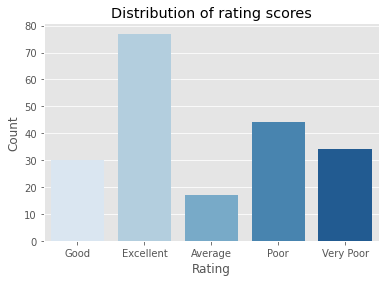

In [29]:
# distribution of rating
sns.countplot(data['rating'], palette='Blues')

plt.title('Distribution of rating scores')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

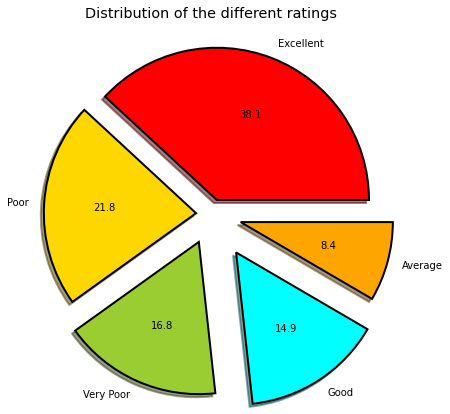

In [30]:
##pie plot about distribution of ratings

fig = plt.figure(figsize=(7,7))
colors = ("red","gold","yellowgreen","cyan","orange")
wp = {'linewidth':2, 'edgecolor':'black'}
tags = data['rating'].value_counts()
explode = (0.1,0.1,0.2,0.3,0.2)
tags.plot(kind='pie', autopct='%1.1f',colors=colors, shadow=True,
          startangle=0, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of the different ratings')
plt.show()

In [31]:
# map ratings to 0 (NEGATIVE) and to 1 (POSITIVE) 
sentiment_score = {'Very Poor': 0,
                   'Poor': 0,
                   'Average': 0,
                   'Good': 1,
                   'Excellent': 1}

sentiment = {0: 'NEGATIVE',
             1: 'POSITIVE'}


# mapping
data['sentiment_score'] = data['rating'].map(sentiment_score)
data['sentiment'] = data['sentiment_score'].map(sentiment)

data.head()

,reviews,rating,sentiment_score,sentiment
0,Nice Car with good interior space and smoothness.,Good,1,POSITIVE
1,Absolutely love this! It nice and melty. Some ...,Excellent,1,POSITIVE
2,It is a good car I am having,Excellent,1,POSITIVE
3,it was good to use and its smells last long,Excellent,1,POSITIVE
4,Taste is super,Good,1,POSITIVE


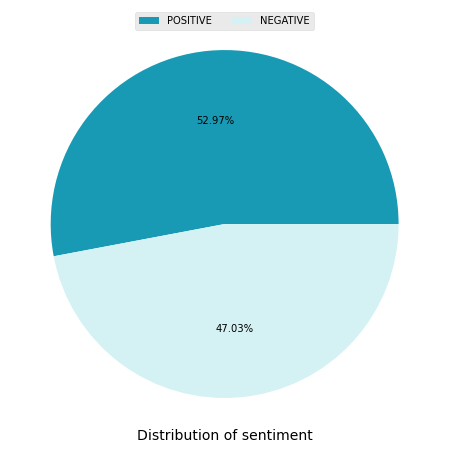

In [32]:
# distribution of sentiment
plt.figure(figsize = (8, 8))

labels = ['POSITIVE', 'NEGATIVE']
colors = ['#189AB4', '#D4F1F4']
plt.pie(data['sentiment'].value_counts(), autopct='%0.2f%%',colors=colors)

plt.title('Distribution of sentiment', size=14, y=-0.01)
plt.legend(labels, ncol=2, loc=9)
plt.show()

## Most used words


In [33]:
# get all used words 
all_words = pd.Series(' '.join(data['reviews']).split())

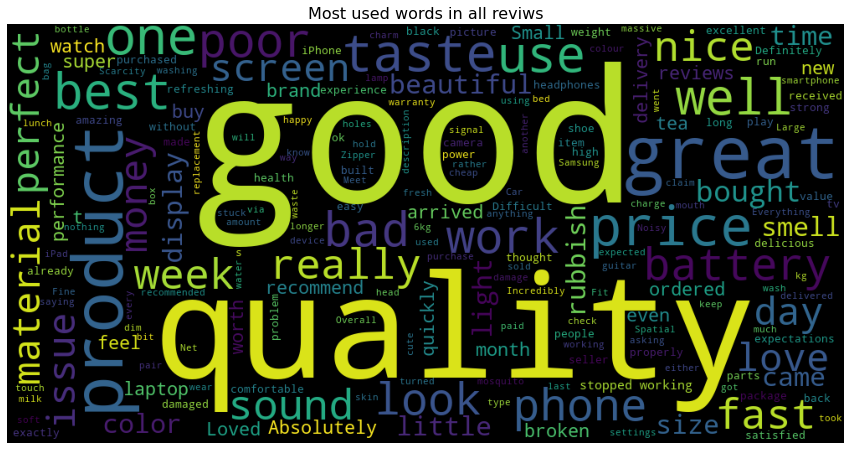

In [34]:
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(all_words))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used words in all reviws", size=16)

plt.axis("off")
plt.show()

In [35]:
# get words used positive reivews 
positiveWords = pd.Series(' '.join(data[data['sentiment']=='POSITIVE']['reviews']).split())

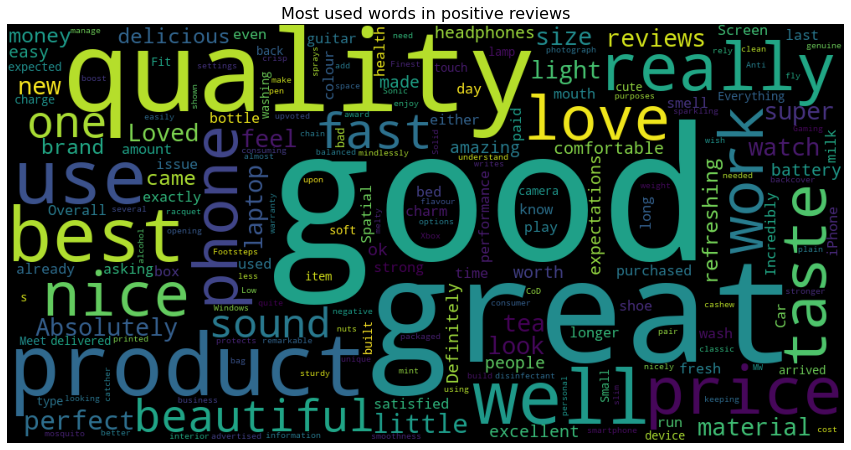

In [36]:
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(positiveWords))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used words in positive reviews", size=16)

plt.axis("off")
plt.show()

In [37]:
# get words used negative reivews 
negativeWords = pd.Series(' '.join(data[data['sentiment']=='NEGATIVE']['reviews']).split())

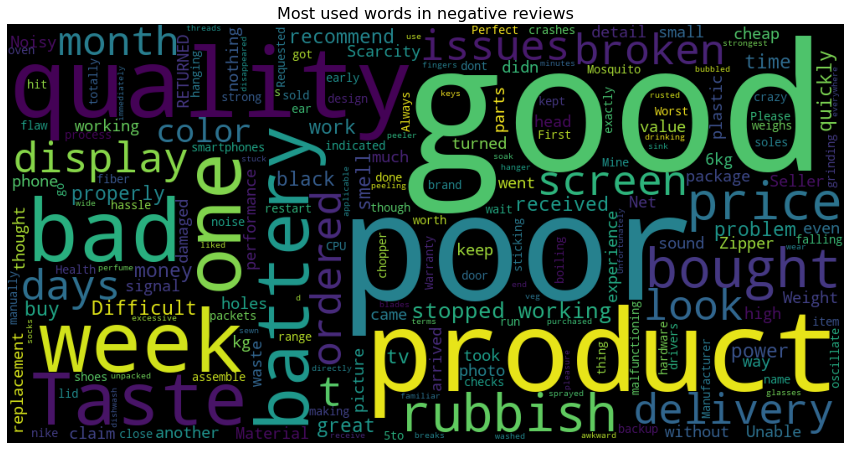

In [38]:
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(negativeWords))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used words in negative reviews", size=16)

plt.axis("off")
plt.show()

## Text Processing

In [39]:
from nltk.corpus import stopwords
stoplist = set(stopwords.words("english"))

In [40]:
lemmatizer = WordNetLemmatizer()

In [41]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [42]:
ps = PorterStemmer()

In [43]:
#function for datacleaning

def data_cleaner(data1):
    clean_data = []
    for sentence in tqdm(data1):
        cleantext = BeautifulSoup(sentence, "lxml").text #html tags
        cleantext = re.sub(r'[^\w\s]','',cleantext) # punctuation
        cleantext = [token for token in cleantext.lower().split() if token not in stoplist] #stopword
        clean_text =[lemmatizer.lemmatize(token) for token in cleantext]
        clean_text=' '.join([ps.stem(w) for w in cleantext])
        clean_data.append(clean_text.strip())
    return clean_data

In [44]:
data.columns

Index(['reviews', 'rating', 'sentiment_score', 'sentiment'], dtype='object')

In [45]:

data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 0 to 100
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   reviews          202 non-null    object
 1   rating           202 non-null    object
 2   sentiment_score  202 non-null    int64 
 3   sentiment        202 non-null    object
dtypes: int64(1), object(3)
memory usage: 7.9+ KB


In [46]:
data.head()

,reviews,rating,sentiment_score,sentiment
0,Nice Car with good interior space and smoothness.,Good,1,POSITIVE
1,Absolutely love this! It nice and melty. Some ...,Excellent,1,POSITIVE
2,It is a good car I am having,Excellent,1,POSITIVE
3,it was good to use and its smells last long,Excellent,1,POSITIVE
4,Taste is super,Good,1,POSITIVE


## Train test split

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,data.sentiment_score, test_size=0.2, random_state=42 ,stratify=data["sentiment_score"])

In [48]:
data.shape

(202, 4)

In [49]:
X_test.shape

(41, 4)

In [50]:
X_train.shape

(161, 4)

In [51]:
y_train.shape

(161,)

In [52]:
y_test.shape

(41,)

In [53]:
clean_data_train_data =  data_cleaner(X_train['reviews'].values)

100%|████████████████████████████████████████████████████████████████████████████████| 161/161 [00:02<00:00, 63.08it/s]


In [54]:
X_train = X_train.reset_index(drop=True)
X_train['cleaned_text'] = clean_data_train_data
X_train.head()

,reviews,rating,sentiment_score,sentiment,cleaned_text
0,Color is a bit faded as description,Poor,0,NEGATIVE,color bit fade descript
1,oven door didn't close properly,Average,0,NEGATIVE,oven door didnt close properli
2,it’s not the strongest but in terms of drinki...,Average,0,NEGATIVE,strongest term drink pleasur tast smell
3,"All good, It is ok for the money I paid",Good,1,POSITIVE,good ok money paid
4,Arrived fast but smelling is unpleasant,Poor,0,NEGATIVE,arriv fast smell unpleas


In [55]:
clean_data_test_data =  data_cleaner(X_test['reviews'].values)

100%|█████████████████████████████████████████████████████████████████████████████████| 41/41 [00:00<00:00, 934.26it/s]


In [56]:
X_test = X_test.reset_index(drop=True)
X_test['cleaned_text'] = clean_data_test_data
X_test.head()

,reviews,rating,sentiment_score,sentiment,cleaned_text
0,Beautiful backcover. It protects my phone well,Good,1,POSITIVE,beauti backcov protect phone well
1,Taste is super,Good,1,POSITIVE,tast super
2,"Good water resistance trouser, also worthy for...",Excellent,1,POSITIVE,good water resist trouser also worthi valu
3,Absolutely massive upgrade from my previous wa...,Excellent,1,POSITIVE,absolut massiv upgrad previou watch seri 5 new...
4,The keys are not working properly,Poor,0,NEGATIVE,key work properli


## Vectorizer

In [57]:
vec = CountVectorizer()
vec.fit(X_train.cleaned_text)
train_x_bow = vec.transform(X_train.cleaned_text)
test_x_bow = vec.transform(X_test.cleaned_text)

In [58]:
print(train_x_bow.shape)
print(test_x_bow.shape)

(161, 577)
(41, 577)


In [59]:
test_x_bow.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [60]:
pd.DataFrame(train_x_bow.toarray(), columns=vec.get_feature_names())

,10,100,20,2xl,absolut,accuraci,acn,action,advertis,africa,...,wors,worst,worth,would,wouldv,write,xbox,xl,youd,zipper
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
158,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
159,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Naive Bayes with Hyperparameter tuning

In [61]:
classfier = MultinomialNB()

In [62]:
alpha_ranges = {"alpha":[10**-2,10**-1,10**0,10**1,10**2]}
grid_search =GridSearchCV(classfier , param_grid = alpha_ranges ,scoring= "accuracy",cv=3,return_train_score = True)
grid_search.fit(train_x_bow,y_train)

GridSearchCV(cv=3, estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             return_train_score=True, scoring='accuracy')

In [63]:
alpha = [10**-2,10**-1,10**0,10**1,10**2]
train_acc = grid_search.cv_results_['mean_train_score']
train_std = grid_search.cv_results_['std_train_score']
test_acc = grid_search.cv_results_['mean_test_score']
test_std = grid_search.cv_results_['std_test_score']

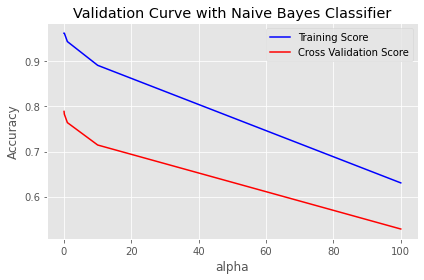

In [64]:

# Plot mean accuracy scores for training and testing scores
plt.plot(alpha, train_acc,
     label = "Training Score", color = 'b')
plt.plot(alpha, test_acc,
   label = "Cross Validation Score", color = 'r')
 
# Creating the plot
plt.title("Validation Curve with Naive Bayes Classifier")
plt.xlabel("alpha")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [65]:
grid_search.best_estimator_

MultinomialNB(alpha=0.01)

In [66]:
classifier = MultinomialNB(alpha=0.01)
classifier.fit(train_x_bow,y_train)

MultinomialNB(alpha=0.01)

In [67]:
predict = classifier.predict(test_x_bow)

In [68]:
print("accuracy is :",accuracy_score(y_test,predict))

accuracy is : 0.7317073170731707


In [69]:
print("accuracy is :",classification_report(y_test,predict))

accuracy is :               precision    recall  f1-score   support

           0       0.70      0.74      0.72        19
           1       0.76      0.73      0.74        22

    accuracy                           0.73        41
   macro avg       0.73      0.73      0.73        41
weighted avg       0.73      0.73      0.73        41



In [ ]:
dump(vec,"vectors_product.joblib")
dump(classifier,"model_product.joblib")